<a href="https://colab.research.google.com/github/fatmab0lat/cifar10-cnn/blob/main/cnn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import urllib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import random, os, glob
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from urllib.request import urlopen

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print("egitim seti boyutu: ",x_train.shape, y_train.shape)

egitim seti boyutu:  (50000, 32, 32, 3) (50000, 1)


In [ ]:
print("test seti boyutu:",x_test.shape, y_test.shape)

test seti boyutu: (10000, 32, 32, 3) (10000, 1)


In [ ]:
num_labels = len(np.unique(y_train))
num_labels

10

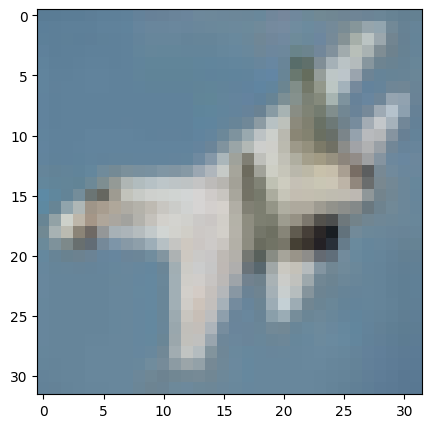

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(x_test[10])

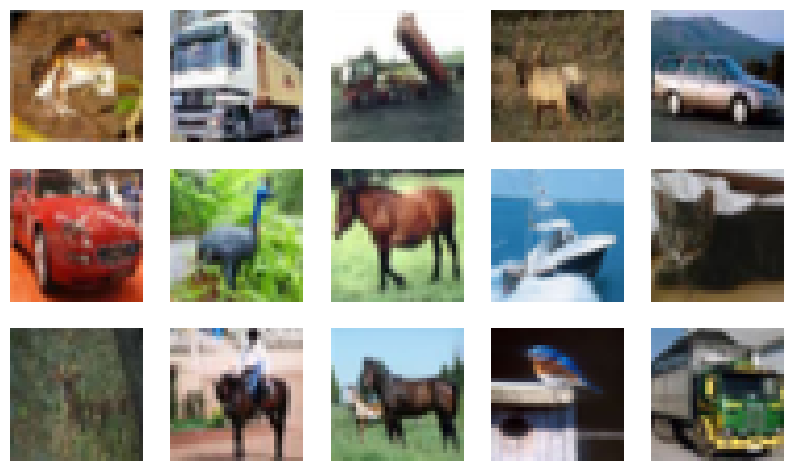

In [ ]:
plt.figure(figsize = (10,10))
for n in range(15):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n])
  plt.axis('off')

In [ ]:
x_train[7][4,17]

array([228, 244, 184], dtype=uint8)

In [ ]:
input_shape = (x_train[0].shape[1], x_train[0].shape[1], 3)
input_shape

(32, 32, 3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
train = ImageDataGenerator(horizontal_flip=True,
                           vertical_flip=True,
                           validation_split=0.1,
                           rescale=1./255,
                           shear_range=0.1,
                           zoom_range = 0.1,
                           width_shift_range = 0.1,
                           height_shift_range=0.1)

test = ImageDataGenerator(rescale=1/255,
                          validation_split=0.1)

In [ ]:
train_generator = train.flow(x_train, y_train, batch_size=32)
test_generator = test.flow(x_test, y_test, batch_size=32)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', input_shape = (input_shape), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

#model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
#model.add(MaxPooling2D(pool_size=2, strides=(2,2)))

model.add(Flatten())

model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units = 32, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units = 10, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "acc"])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 50, verbose = 1, mode = 'min'),
             ModelCheckpoint(filepath = 'mymodel.h5', monitor = "val_loss", mode = 'min', save_best_only = True, save_weights_only=False)]

In [ ]:
print(len(x_test) // 32)

312


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
history = model.fit_generator(generator = train_generator,
                              epochs = 50,
                              validation_data = test_generator,
                              callbacks = callbacks,
                              workers = 4,
                              steps_per_epoch=1562,
                              validation_steps=312)

Epoch 1/50
   1/1562 [..............................] - ETA: 2:53 - loss: 1.3503 - precision: 0.7059 - recall: 0.3750 - acc: 0.5938

<ipython-input-47-c39472ced168>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator,


1562/1562 [==============================] - 50s 32ms/step - loss: 1.2862 - precision: 0.7208 - recall: 0.3493 - acc: 0.5431 - val_loss: 1.2018 - val_precision: 0.7154 - val_recall: 0.4266 - val_acc: 0.5754
Epoch 2/50
1562/1562 [==============================] - 50s 32ms/step - loss: 1.2768 - precision: 0.7210 - recall: 0.3539 - acc: 0.5461 - val_loss: 1.1327 - val_precision: 0.7687 - val_recall: 0.4187 - val_acc: 0.6010
Epoch 3/50
   1/1562 [..............................] - ETA: 2:48 - loss: 1.2688 - precision: 0.7059 - recall: 0.3750 - acc: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1562/1562 [==============================] - 49s 32ms/step - loss: 1.2730 - precision: 0.7242 - recall: 0.3585 - acc: 0.5491 - val_loss: 1.0881 - val_precision: 0.7642 - val_recall: 0.4393 - val_acc: 0.6093
Epoch 4/50
1562/1562 [==============================] - 49s 31ms/step - loss: 1.2611 - precision: 0.7256 - recall: 0.3658 - acc: 0.5527 - val_loss: 1.1116 - val_precision: 0.7766 - val_recall: 0.4217 - val_acc: 0.6036
Epoch 5/50
1562/1562 [==============================] - 49s 32ms/step - loss: 1.2542 - precision: 0.7270 - recall: 0.3717 - acc: 0.5542 - val_loss: 1.0985 - val_precision: 0.7630 - val_recall: 0.4388 - val_acc: 0.6122
Epoch 6/50
1562/1562 [==============================] - 49s 31ms/step - loss: 1.2476 - precision: 0.7275 - recall: 0.3733 - acc: 0.5547 - val_loss: 1.1149 - val_precision: 0.7541 - val_recall: 0.4402 - val_acc: 0.5997
Epoch 7/50
1562/1562 [==============================] - 49s 31ms/step - loss: 1.2431 - precision: 0.7280 - recall: 0.3762 - acc: 0.5589 - v

In [ ]:
model.save('cifar10_model.h5')

In [ ]:
y_test[10]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
probability = model.predict(x_test[10].reshape(1,32,32,3))
probability

1/1 [==============================] - 0s 29ms/step


array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        5.664791e-19, 0.000000e+00]], dtype=float32)